# Code

The code for running NASTyLinker has been integrated into the CaLiGraph extraction framework,
as this is the easiest way to access the LISTING dataset.
The main code base to reproduce the results can be found in `impl.subject_entity.entity_disambiguation` (contains datasets, matchers, evaluators).
In addition to that, we provide the code for generating the figures of the paper and the results of the qualitative analysis in this notebook.

For running the experiments, we provide two scripts `evaluate_entity_disambiguation.py`
(for running single matchers like NASTyLinker) and `tune_entity_disambiguation.py` (for finding the best
hyperparameters for the clustering matchers). Results are logged under `logs/ED/` and can best be viewed
with Tensorboard (contained in dev-dependencies). Matchers results have to be created in the correct order
(i.e., when intending to run NASTyLinker, results from a Bi-Encoder and potentially Cross-Encoder need
to be generated first). The first run of the framework will take a considerable amount of time,
as caches for CaLiGraph are initialized and the LISTING dataset is prepared (see main README
of CaLiGraph for further instructions on how to setup the system).

# Configurations of the Paper Results

| *NILK*     |$\tau_m$|$\tau_e$|$\tau_a$|
|------------|--------|--------|--------|
|*No Reranking*|  -   |    -   |    -   |
|Bottom-Up   |   0.9  |  0.9   |    -   |
|Majority    |   0.85 |  0.8   |    -   |
|NASTyLinker |   0.8  |  0.85  |  0.75  |
|*Mention Reranking*|-|    -   |    -   |
|Bottom-Up   |   0.8  |  0.9   |    -   |
|Majority    |   0.85 |  0.8   |    -   |
|NASTyLinker |   0.8  |  0.8   |  0.75  |
|*Entity Reranking*|- |    -   |    -   |
|Bottom-Up   |   0.9  |  0.9   |    -   |
|Majority    |   0.85 |  0.75  |    -   |
|NASTyLinker |   0.8  |  0.9   |  0.75  |
|*Full Reranking*| -  |    -   |    -   |
|Bottom-Up   |  0.8   |  0.9   |    -   |
|Majority    |  0.85  |  0.75  |    -   |
|NASTyLinker |  0.8   |  0.9   |  0.75  |

| *LISTING*  |$\tau_m$|$\tau_e$|$\tau_a$|
|------------|--------|--------|--------|
|*No Reranking*|  -   |    -   |    -   |
|Bottom-Up   |  0.9   |  0.9   |    -   |
|Majority    |  0.85  |  0.8   |    -   |
|NASTyLinker |  0.8   |  0.85  |  0.75  |
|*Entity Reranking*|- |    -   |    -   |
|Bottom-Up   |  0.9   |  0.85  |    -   |
|Majority    |  0.9   |  0.8   |    -   |
|NASTyLinker |  0.9   |  0.85  |  0.8   |

# Precomputed Results

The predictions for the LISTING dataset can be accessed [here](https://zenodo.org/record/7484308#.Y6nLHC8w0mY). The file is in json format and contains a list of entities (which may be known or NIL) with the mentions that have been identified for them. The fields are as follows:

```
idx: Index of the entity
name: Name of the entity (None, if NIL-entity)
is_nil: Whether the entity is a NIL-entity
mentions: (list)
  page: Name of the page where the mention is found
  listing: Index of the listing where the mention is found
  item: Index of the item within the listing where the mention is found
  text: Mention text
```

# Charts

## Scalability

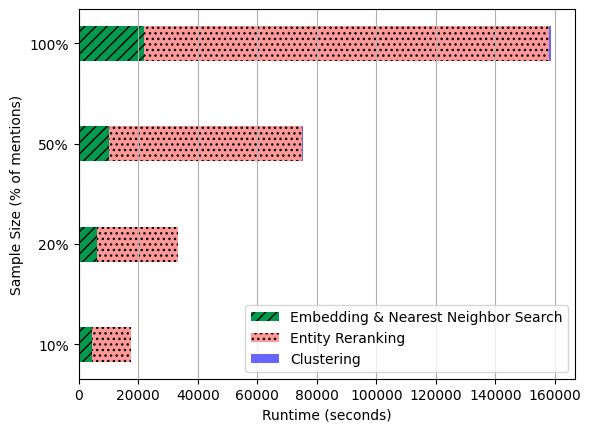

In [8]:
# runtime (absolute)
import matplotlib.pyplot as plt

labels = ['10%', '20%', '50%', '100%']
embedding = [4400, 6000, 10300, 22000]
reranking = [13000, 27300, 64700, 136000]
clustering = [31, 156, 314, 715]
height = 0.35  # height of the bars

fig, ax = plt.subplots()
ax.barh(labels, embedding, align='center', height=height, color='#00994D', hatch='///', label='Embedding & Nearest Neighbor Search')
ax.barh(labels, reranking, align='center', height=height, color='#FF9999', hatch='...', left=embedding, label='Entity Reranking')
ax.barh(labels, clustering, align='center', height=height, color='#6666FF', left=[sum(x) for x in zip(embedding, reranking)], label='Clustering')

ax.set_yticks(labels)
ax.set_xlabel('Runtime (seconds)')
ax.set_ylabel('Sample Size (% of mentions)')
ax.grid(True, axis='x')
ax.legend()

plt.show()
fig.savefig('nastylinker_scalability.pdf', dpi=100)

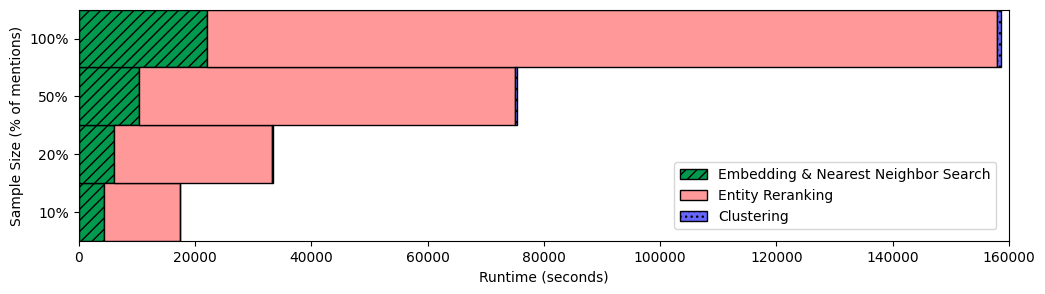

In [31]:
# runtime (dense)
height = 1    
fig, ax = plt.subplots()
fig.set_size_inches((12,3))
ax.barh(labels, embedding, align='center', height=height, color='#00994D', edgecolor='black', hatch='///', label='Embedding & Nearest Neighbor Search')
ax.barh(labels, reranking, align='center', height=height, color='#FF9999', edgecolor='black', left=embedding, label='Entity Reranking')
ax.barh(labels, clustering, align='center', height=height, color='#6666FF', edgecolor='black', hatch='...', left=[sum(x) for x in zip(embedding, reranking)], label='Clustering')

#ax.set_xticks(range(0, 101, 5))
ax.set_yticks(labels)
ax.set_xlabel('Runtime (seconds)')
ax.set_ylabel('Sample Size (% of mentions)')
ax.legend(loc=(0.64, 0.05))

plt.xlim((0, 160000))
plt.ylim((-.5, 3.5))
plt.show()
fig.savefig('nastylinker_scalability_dense.pdf', bbox_inches='tight', dpi=100)

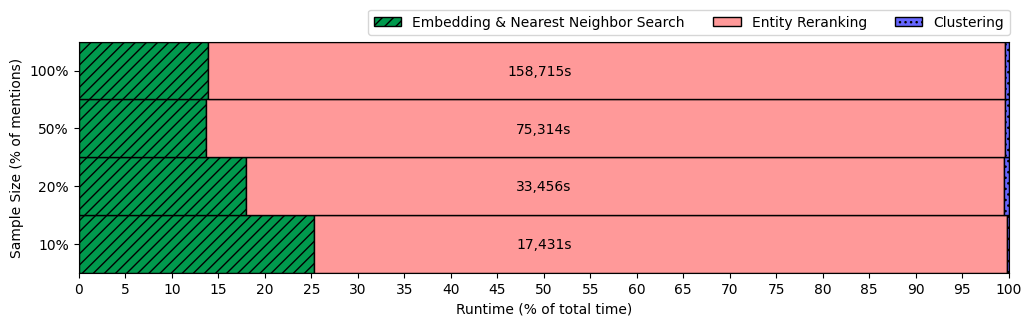

In [234]:
# runtime (relative)
height = 1
embedding_rel, reranking_rel, clustering_rel = [], [], []
for e, r, c in zip(embedding, reranking, clustering):
    total = e + r + c
    embedding_rel.append(e / total * 100)
    reranking_rel.append(r / total * 100)
    clustering_rel.append(c / total * 100)
    
fig, ax = plt.subplots()
fig.set_size_inches((12,3))
ax.barh(labels, embedding_rel, align='center', height=height, color='#00994D', edgecolor='black', hatch='///', label='Embedding & Nearest Neighbor Search')
ax.barh(labels, reranking_rel, align='center', height=height, color='#FF9999', edgecolor='black', left=embedding_rel, label='Entity Reranking')
ax.barh(labels, clustering_rel, align='center', height=height, color='#6666FF', edgecolor='black', hatch='...', left=[sum(x) for x in zip(embedding_rel, reranking_rel)], label='Clustering')

ax.set_xticks(range(0, 101, 5))
ax.set_yticks(labels)
ax.set_xlabel('Runtime (% of total time)')
ax.set_ylabel('Sample Size (% of mentions)')
ax.legend(loc=(0.311, 1.03), ncol=3)

plt.annotate('17,431s', (.53, .105), xycoords='axes fraction', ha='right')
plt.annotate('33,456s', (.53, .355), xycoords='axes fraction', ha='right')
plt.annotate('75,314s', (.53, .6), xycoords='axes fraction', ha='right')
plt.annotate('158,715s', (.53, .853), xycoords='axes fraction', ha='right')

plt.xlim((0, 100))
plt.ylim((-.5, 3.5))
plt.show()
fig.savefig('nastylinker_scalability_rel.pdf', bbox_inches='tight', dpi=100)

# Qualitative Analysis

## Setup

In [3]:
from collections import defaultdict
import random
import pandas as pd
from impl.caligraph.entity import ClgEntityStore
from impl.wikipedia import MentionId, WikiPageStore
from impl.dbpedia.resource import DbpResourceStore
from impl.util.rdf import res2wiki_iri
from impl.subject_entity.entity_disambiguation.matching.io import load_candidate_alignment
import utils

clge = ClgEntityStore.instance()
wps = WikiPageStore.instance()
dbr = DbpResourceStore.instance()

mentions = utils.load_cache('subject_entity_mentions')
disambiguated_mentions = utils.load_cache('disambiguated_subject_entity_mentions')
wps.set_subject_entity_mentions(mentions)

disambiguated_mention_ids = {MentionId(p_idx, l_idx, i_idx): ent for p_idx, listings in disambiguated_mentions.items() for l_idx, items in listings.items() for i_idx, ent in items.items()}
disambiguated_clusters = defaultdict(set)
for m_id, ent in disambiguated_mention_ids.items():
    disambiguated_clusters[ent].add(m_id)
    
ca = load_candidate_alignment('biencoder_full')
mention_id_sample = random.sample(list(disambiguated_mention_ids), 100)
cluster_id_sample = random.sample(list(disambiguated_clusters), 100)

def get_mention_details(m_id, omit_ent=False):
    label = wps.get_subject_entity(m_id).label
    page = res2wiki_iri(dbr.get_resource_by_idx(m_id[0]))
    if omit_ent or m_id not in disambiguated_mention_ids:
        return f'{label} {page}'
    pred = disambiguated_mention_ids[m_id]
    pred_known = clge.has_entity_with_idx(pred)
    return f'{label} {page} => {pred} ({"known" if pred_known else "unknown"})'

def group_results(labels, predicted_known):
    df = pd.DataFrame({'labels': labels, 'predicted_known': predicted_known})
    return df.groupby(by='predicted_known').value_counts()

## Result Statistics

In [9]:
# Mention Stats
print('Pages', len({m[0] for m in disambiguated_mention_ids}))
print('Listings', len({(m[0], m[1]) for m in disambiguated_mention_ids}))
print('Mentions', len(disambiguated_mention_ids))

Pages 1439293
Listings 2852325
Mentions 18658271


In [27]:
# Linking Stats
import numpy as np

num_ents = len(set(disambiguated_mention_ids.values()))
known_ents = {e for e in disambiguated_mention_ids.values() if clge.has_entity_with_idx(e)}
known_clusters = [len(m_ids) for ent, m_ids in disambiguated_clusters.items() if ent in known_ents]
unknown_clusters = [len(m_ids) for ent, m_ids in disambiguated_clusters.items() if ent not in known_ents]
print('Entities', num_ents)
print('Known entities', len(known_ents))
print('Unknown entities', num_ents - len(known_ents))
print('Known mentions', sum(1 for e in disambiguated_mention_ids.values() if e in known_ents))
print('Unknown mentions', sum(1 for e in disambiguated_mention_ids.values() if e not in known_ents))
print('Known Cluster Avg./Med. Mentions', np.mean(known_clusters), np.median(known_clusters))
print('Unknown Cluster Avg./Med. Mentions', np.mean(unknown_clusters), np.median(unknown_clusters))

Entities 9015377
Known entities 1362112
Unknown entities 7653265
Known mentions 5230377
Unknown mentions 13427894
Known Cluster Avg./Med. Mentions 3.839902298783066 2.0
Unknown Cluster Avg./Med. Mentions 1.754531432009737 1.0


## Evaluate Clusters

In [66]:
for idx, ent_id in enumerate(cluster_id_sample):
    m_ids = disambiguated_clusters[ent_id]
    ent = dbr.get_resource_by_idx(ent_id) if ent_id in known_ents else None
    label = 'UNKNOWN' if ent is None else ent.get_label()
    page = '' if ent is None else res2wiki_iri(ent)
    print()
    print(f' * * {idx+1} * * ')
    print('ENTITY:', label, page)
    print('MENTIONS')
    for m_id in m_ids:
        print('>', get_mention_details(m_id, True))
    
    candidates = {cand for m_id in m_ids for cand in ca['predict'].mention_to_target_mapping[m_id] if cand not in m_ids and cand != ent}
    mention_cands = {c for c in candidates if isinstance(c, MentionId)}
    entity_cands = {c for c in candidates if isinstance(c, int)}
    print('CANDIDATE MENTIONS')
    for mc in mention_cands:
        print('>', get_mention_details(mc))
    print('CANDIDATE ENTITIES')
    for ec in entity_cands:
        ent = dbr.get_resource_by_idx(ec)
        print(ent.get_label(), res2wiki_iri(ent))


 * * 1 * * 
ENTITY: UNKNOWN 
MENTIONS
> Galabeya http://en.wikipedia.org/wiki/Folk_costume
CANDIDATE MENTIONS
> Galaal http://en.wikipedia.org/wiki/Somali_name => 20940501 (unknown)
> Galatea http://en.wikipedia.org/wiki/List_of_mythological_objects
> Galata http://en.wikipedia.org/wiki/Index_of_Byzantine_Empire–related_articles
> Agbada http://en.wikipedia.org/wiki/Folk_costume => 7261991 (known)
CANDIDATE ENTITIES
Jellabiya http://en.wikipedia.org/wiki/Jellabiya
Gala (king) http://en.wikipedia.org/wiki/Gala_(king)
Galatea (mythology) http://en.wikipedia.org/wiki/Galatea_(mythology)
Galala marble http://en.wikipedia.org/wiki/Galala_marble

 * * 2 * * 
ENTITY: UNKNOWN 
MENTIONS
> A Collection of Chirurgical Tracts http://en.wikipedia.org/wiki/William_Becket
CANDIDATE MENTIONS
> A Collection of Several Tracts http://en.wikipedia.org/wiki/1727_in_literature => 21835965 (unknown)
> Tracts http://en.wikipedia.org/wiki/Richard_Preston_(MP) => 16288439 (unknown)
CANDIDATE ENTITIES
Poems on 

In [67]:
# 0: correct
# 1: invalid mention
# 2: mapped to NIL-entity while correct entity is in KG
# 3: clustered mentions from multiple entities
# 4: not all mentions found for cluster entity
# 5: mapped to known entity, but should be NIL-entity

cluster_labels = [2, 0, 0, 0, 0, 0, 0, 0, 5, 3, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 1, 0, 0, 0, 0, 0, 4, 0, 0, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 1, 3, 1, 4, 4, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 3, 0]
cluster_predicted_known = [e_id in known_ents for e_id in cluster_id_sample]
group_results(cluster_labels, cluster_predicted_known)

predicted_known  labels
False            0         71
                 1          4
                 3          4
                 2          1
True             0          8
                 4          8
                 5          3
                 3          1
dtype: int64

## Evaluate Mentions

In [56]:
for idx, m_id in enumerate(mention_id_sample):
    candidates = ca['predict'].mention_to_target_mapping[m_id]
    mention_cands = {c for c in candidates if isinstance(c, MentionId)}
    entity_cands = {c for c in candidates if isinstance(c, int)}
    print()
    print(f' * * {idx+1} * * ')
    print(get_mention_details(m_id))
    print('CANDIDATE ENTITIES')
    for rel_ent_id in entity_cands:
        ent = dbr.get_resource_by_idx(rel_ent_id)
        print(f'{ent.get_label()} ({rel_ent_id}): {res2wiki_iri(ent)}')


 * * 1 * * 
Caldbeck http://en.wikipedia.org/wiki/List_of_tallest_structures_in_the_Commonwealth_of_Nations => 1968667 (known)
CANDIDATE ENTITIES
Listed buildings in Caldbeck (14194625): http://en.wikipedia.org/wiki/Listed_buildings_in_Caldbeck
Caldbeck (1968667): http://en.wikipedia.org/wiki/Caldbeck
Caldicot (2435493): http://en.wikipedia.org/wiki/Caldicot
Caldbeck transmitting station (6654054): http://en.wikipedia.org/wiki/Caldbeck_transmitting_station

 * * 2 * * 
Impossible Stories http://en.wikipedia.org/wiki/Hawk_Alfredson => 20728036 (unknown)
CANDIDATE ENTITIES
Impossible (novel) (12064152): http://en.wikipedia.org/wiki/Impossible_(novel)
Impossible Things (8907705): http://en.wikipedia.org/wiki/Impossible_Things
Impossible Dreams (9118143): http://en.wikipedia.org/wiki/Impossible_Dreams
The Impossible (2017 novel) (7257999): http://en.wikipedia.org/wiki/The_Impossible_(2017_novel)

 * * 3 * * 
George Burg http://en.wikipedia.org/wiki/1944_Michigan_Wolverines_football_team =

In [65]:
# 0: correct
# 1: invalid mention
# 2: mapped to NIL-entity while correct entity is in KG
# 3: mapped to known entity, but should be NIL-entity

mention_labels = [0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
mention_predicted_known = [disambiguated_mention_ids[m_id] in known_ents for m_id in mention_id_sample]
group_results(mention_labels, mention_predicted_known)

predicted_known  labels
False            0         64
                 1          6
                 2          3
True             0         20
                 3          7
dtype: int64